In [11]:
from pmdarima.arima import auto_arima, ADFTest
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
target = pd.read_csv("micron.csv")


In [5]:
target['date'] = pd.to_datetime(target['date'])
target = target.set_index('date', drop=True)

<AxesSubplot:xlabel='date'>

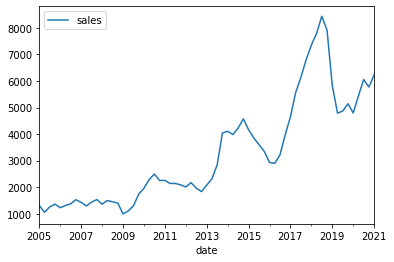

In [6]:
target.plot()

In [9]:
adf = ADFTest(alpha=0.05)
adf.should_diff(target)

(0.014425783750304481, False)

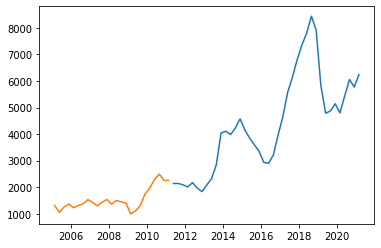

In [12]:
train = target[:40]
test = target[40:]
plt.plot(train)
plt.plot(test)

In [13]:

arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=428.513, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=424.162, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=423.810, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=422.495, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=423.974, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=424.389, Time=0.02 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=424.437, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=422.882, Time=0.01 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=424.266, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.857 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   40
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -209.248
Date:                             Sun, 18 Jul 2021   AIC                            422.495
Time:                                     10:16:49   BIC                            425.087
Sample:                                          0   HQIC                           423.266
                                              - 40                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6524      0.122      5.358      0.000       0.414       0.891
sigma2      2.544e+05   8.55e+04      2.976      0.003    8.68e+04    4.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.87   Prob(JB):                         0.59
Heteroskedasticity (H):               0.14   Skew:                            -0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 25),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
date,
2011-02-28,2233.200452
2010-11-30,2168.200452
2010-08-31,969.200452
2010-05-31,444.200452
2010-02-28,204.200452
2009-11-30,-39.799548
2009-08-31,89.200452
2009-05-31,298.200452
2009-02-28,135.200452


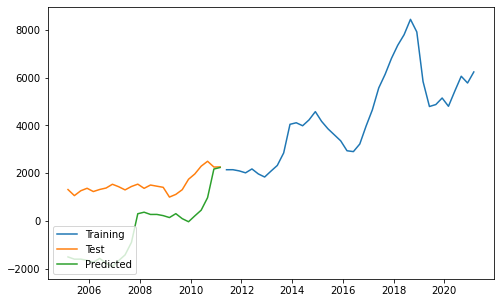

In [19]:

plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower left')
plt.show()

In [20]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['sales'], test['predicted_sales'])

<ipython-input-20-ea3e4d7f28dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = prediction


-28.077894367107433